In [2]:

import os
import json

In [54]:
import matplotlib.pyplot as plt

def plot_loss_curve(dir_path):
    dirs = list(filter(lambda x: 'checkpoint' in x,os.listdir(dir_path)))
    final_checkpoint = 'checkpoint-' + str(max([int(d.split('checkpoint-')[1]) for d in dirs]))
    print(final_checkpoint)
    
    # load trainer state
    with open(os.path.join(dir_path,final_checkpoint,'trainer_state.json'),'r') as f:
        log_history = json.load(f)['log_history']
    train_epochs = []
    eval_epochs = []
    train_losses = []
    eval_losses = []
    for state in log_history:
        if 'loss' in state:
            train_epochs.append(state['epoch'])
            train_losses.append(state['loss'])
        elif 'eval_loss'  in state:
            eval_epochs.append(state['epoch'])
            eval_losses.append(state['eval_loss'])

    # plot loss curve
    fig, axs = plt.subplots(2, figsize=(8, 10))  # 创建两个子图
    axs[0].plot(train_epochs,train_losses)
    axs[0].set_xlabel('epochs')
    axs[0].set_ylabel('loss')
    axs[0].set_title('training loss curve')
    axs[1].plot(eval_epochs,eval_losses)
    axs[1].set_xlabel('epochs')
    axs[1].set_ylabel('loss')
    axs[1].set_title('eval loss curve')

checkpoint-200


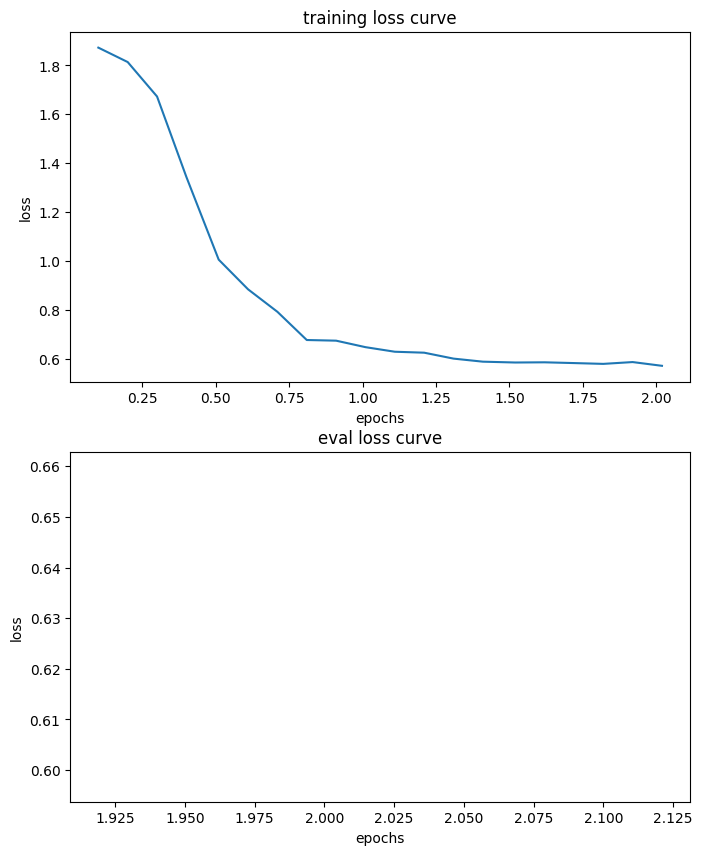

In [57]:
plot_loss_curve('trained_models/llama-lora/')

checkpoint-1760


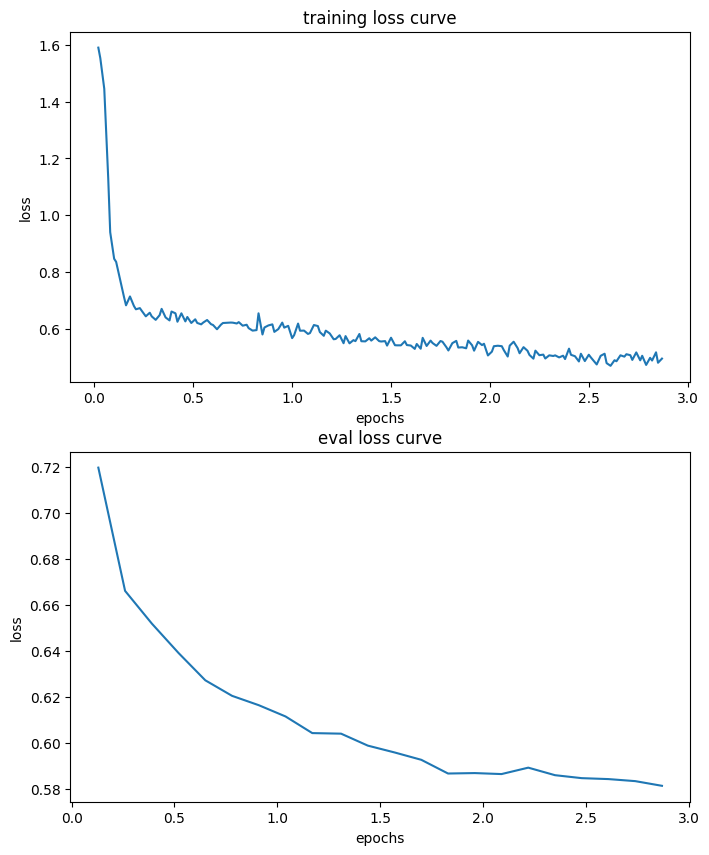

In [52]:
plot_loss_curve('trained_models/llama-lora-10k/')

checkpoint-5000


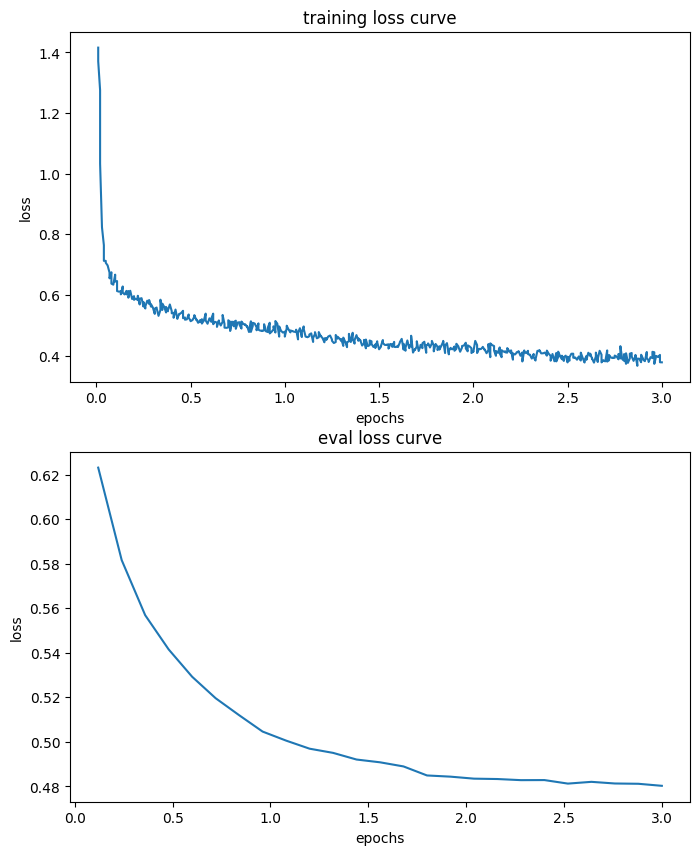

In [55]:
plot_loss_curve('trained_models/llama-lora-50k/')